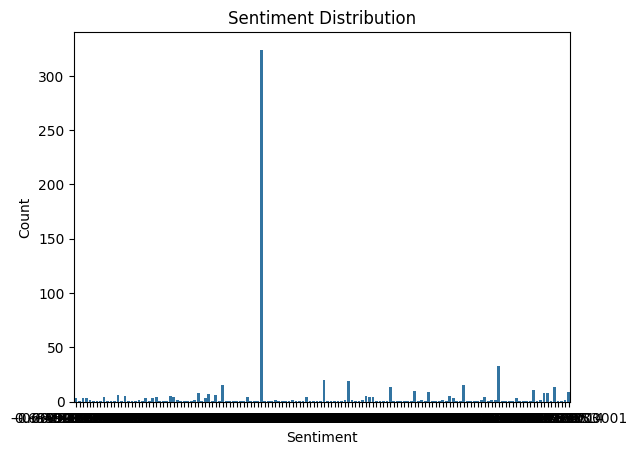

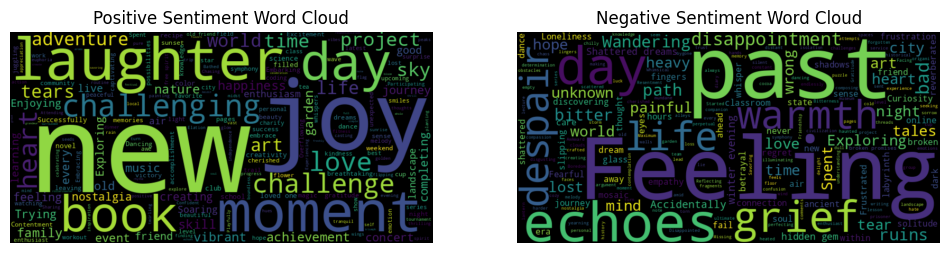

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob  # Sentiment analysis library
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv("/content/archive.zip")

# Perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

data['Sentiment'] = data['Text'].apply(get_sentiment)

# Visualize sentiment distribution
sns.countplot(x='Sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Generate word cloud for positive and negative sentiments
positive_words = ' '.join(data[data['Sentiment'] > 0]['Text'])
negative_words = ' '.join(data[data['Sentiment'] < 0]['Text'])

positive_wordcloud = WordCloud(width=800, height=400).generate(positive_words)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()